<a href="https://colab.research.google.com/github/xorToja/data-science-bootcamp/blob/master/02_analiza_danych/05_appstore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import bibliotek

In [3]:
import numpy as np
import pandas as pd

# Załadowanie danych

In [6]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/appstore_games.csv'
df_raw = pd.read_csv(url)
df_raw.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


# Wstępne przygotowanie danych - preprocessing

In [7]:
df_raw.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [9]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

In [11]:
df = df.drop(columns=['URL', 'Icon URL', 'Subtitle', 'Description', 'In-app Purchases'])
df

KeyError: ignored

In [12]:
df.head()

,ID,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [13]:
df.set_index('ID')

,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
ID,,,,,,,,,,,,
284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1474626442,Stack Puzzle : Rise Tower,NaN,NaN,0.00,Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
1474919257,EachOther,NaN,NaN,0.00,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
1474962324,Rabbit Vs Tortoise,NaN,NaN,0.00,Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019


In [16]:
df.describe(include = ['object']).T

,count,unique,top,freq
Name,17007,16847,Kiloton,2
Developer,17007,8693,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,123
Age Rating,17007,4,4+,11806
Languages,16947,990,EN,12467
Primary Genre,17007,21,Games,16286
Genres,17007,1004,"Games, Strategy, Puzzle",778
Original Release Date,17007,3084,2/09/2016,75
Current Version Release Date,17007,2512,1/08/2019,118


In [17]:
df.columns

Index(['ID', 'Name', 'Average User Rating', 'User Rating Count', 'Price',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [18]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [19]:
df.columns

Index(['id', 'name', 'average_user_rating', 'user_rating_count', 'price',
       'developer', 'age_rating', 'languages', 'size', 'primary_genre',
       'genres', 'original_release_date', 'current_version_release_date'],
      dtype='object')

# Jak zbadać rozkład zmiennej

In [20]:
df.head()

,id,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [21]:
df.primary_genre.value_counts()

Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Social Networking        9
Book                     9
News                     7
Health & Fitness         5
Food & Drink             4
Navigation               3
Music                    3
Medical                  2
Shopping                 1
Travel                   1
Name: primary_genre, dtype: int64

In [22]:
df.primary_genre.value_counts().nlargest(5)

Games            16286
Education          222
Entertainment      198
Utilities           77
Sports              60
Name: primary_genre, dtype: int64

In [23]:
df.primary_genre.value_counts().nlargest(5).index

Index(['Games', 'Education', 'Entertainment', 'Utilities', 'Sports'], dtype='object')

In [24]:
list(df.primary_genre.value_counts().nlargest(5).index)

['Games', 'Education', 'Entertainment', 'Utilities', 'Sports']

In [25]:
df.age_rating.value_counts()

4+     11806
9+      2481
12+     2055
17+      665
Name: age_rating, dtype: int64

In [26]:
type(df.age_rating.value_counts())

pandas.core.series.Series

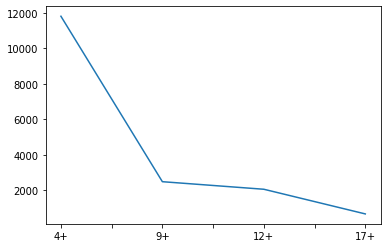

In [27]:
df.age_rating.value_counts().plot()

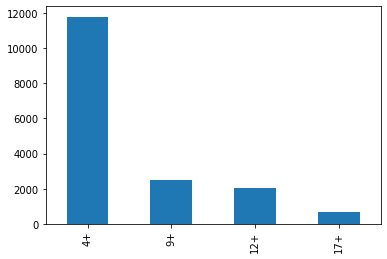

In [28]:
df.age_rating.value_counts().plot(kind = 'bar')

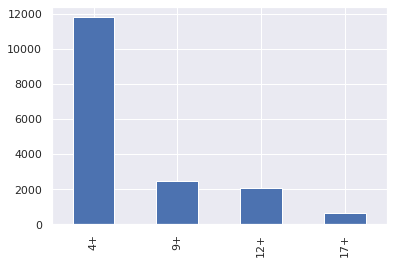

In [30]:
import seaborn as sns
sns.set()
_ = df.age_rating.value_counts().plot(kind = 'bar') # nie wyswietli tego dziwnego linku info

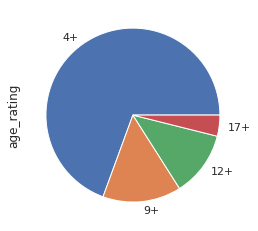

In [32]:
_ = df.age_rating.value_counts().plot(kind = 'pie')

In [35]:
df.price.value_counts()

0.00      14212
0.99       1078
1.99        515
2.99        471
4.99        237
3.99        163
9.99         88
11.99        59
5.99         42
6.99         32
179.99       30
7.99         17
8.99         13
19.99         9
14.99         4
12.99         3
16.99         2
29.99         2
99.99         1
36.99         1
59.99         1
139.99        1
37.99         1
18.99         1
Name: price, dtype: int64

In [36]:
df.average_user_rating.value_counts()

4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: average_user_rating, dtype: int64

In [37]:
df.languages

0        DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
1                                                       EN
2                                                       EN
3        DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
4        DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...
                               ...                        
17002                                                   EN
17003                                                   EN
17004                                                   EN
17005                                                   EN
17006                                               EN, ZH
Name: languages, Length: 17007, dtype: object

In [38]:
df.languages.value_counts()


EN                                                                                                                            12467
EN, ZH                                                                                                                          354
CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH, TR                                                                  277
EN, ZH, ZH                                                                                                                      248
EN, DE                                                                                                                          147
                                                                                                                              ...  
ZH, EN, FR, DE, ID, IT, JA, KO, PT, RU, ZH, ES, TH, ZH, TR                                                                        1
CA, ZH, HR, CS, DA, NL, EN, FI, FR, DE, EL, HU, ID, IT, JA, KO, MS, NB, PL, 

In [40]:
df.languages.str.split(', ') # dodanie .str. pozwala uzywac funkcji tekstowych

0        [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
1                                                     [EN]
2                                                     [EN]
3        [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
4        [DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, R...
                               ...                        
17002                                                 [EN]
17003                                                 [EN]
17004                                                 [EN]
17005                                                 [EN]
17006                                             [EN, ZH]
Name: languages, Length: 17007, dtype: object

In [44]:
df.languages.str.split(', ').str.len()


0        17.0
1         1.0
2         1.0
3        17.0
4        15.0
         ... 
17002     1.0
17003     1.0
17004     1.0
17005     1.0
17006     2.0
Name: languages, Length: 17007, dtype: float64

In [45]:
df['num_lang'] = df.languages.str.split(', ').str.len()
df.head()

,id,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date,num_lang
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,17.0
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,1.0
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,1.0
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,17.0
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,15.0


In [46]:
df.num_lang.value_counts()

1.0      12566
2.0       1102
3.0        495
16.0       316
4.0        261
5.0        247
6.0        220
25.0       171
9.0        154
11.0       147
8.0        142
10.0       140
7.0        140
31.0       133
12.0        91
21.0        77
13.0        64
14.0        64
15.0        54
17.0        37
30.0        35
32.0        34
19.0        34
33.0        33
22.0        31
18.0        24
46.0        20
26.0        18
20.0        14
24.0        13
23.0        11
27.0        11
28.0         9
29.0         8
45.0         6
44.0         5
65.0         4
42.0         3
43.0         3
49.0         2
36.0         2
76.0         1
48.0         1
66.0         1
35.0         1
111.0        1
34.0         1
Name: num_lang, dtype: int64

# Sprawdzanie braków w danych

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            17007 non-null  int64  
 1   name                          17007 non-null  object 
 2   average_user_rating           7561 non-null   float64
 3   user_rating_count             7561 non-null   float64
 4   price                         16983 non-null  float64
 5   developer                     17007 non-null  object 
 6   age_rating                    17007 non-null  object 
 7   languages                     16947 non-null  object 
 8   size                          17006 non-null  float64
 9   primary_genre                 17007 non-null  object 
 10  genres                        17007 non-null  object 
 11  original_release_date         17007 non-null  object 
 12  current_version_release_date  17007 non-null  object 
 13  n

In [49]:
df.average_user_rating.value_counts(dropna = False)

NaN    9446
4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: average_user_rating, dtype: int64

In [51]:
df.isnull()

,id,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date,num_lang
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,False,False,True,True,False,False,False,False,False,False,False,False,False,False
17003,False,False,True,True,False,False,False,False,False,False,False,False,False,False
17004,False,False,True,True,False,False,False,False,False,False,False,False,False,False
17005,False,False,True,True,False,False,False,False,False,False,False,False,False,False


In [52]:
df.isnull().sum() # jeżeli w danej kolumnie znajdzie prawda to doda, natomiast dla fałsz nie

id                                 0
name                               0
average_user_rating             9446
user_rating_count               9446
price                             24
developer                          0
age_rating                         0
languages                         60
size                               1
primary_genre                      0
genres                             0
original_release_date              0
current_version_release_date       0
num_lang                          60
dtype: int64

In [53]:
df = df.dropna() # usuwa cały wiersz, jeżeli występuje jakikolwiek brak danych w nim
df.isnull().sum()

id                              0
name                            0
average_user_rating             0
user_rating_count               0
price                           0
developer                       0
age_rating                      0
languages                       0
size                            0
primary_genre                   0
genres                          0
original_release_date           0
current_version_release_date    0
num_lang                        0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7537 entries, 0 to 16993
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            7537 non-null   int64  
 1   name                          7537 non-null   object 
 2   average_user_rating           7537 non-null   float64
 3   user_rating_count             7537 non-null   float64
 4   price                         7537 non-null   float64
 5   developer                     7537 non-null   object 
 6   age_rating                    7537 non-null   object 
 7   languages                     7537 non-null   object 
 8   size                          7537 non-null   float64
 9   primary_genre                 7537 non-null   object 
 10  genres                        7537 non-null   object 
 11  original_release_date         7537 non-null   object 
 12  current_version_release_date  7537 non-null   object 
 13  nu